In [2]:

import numpy as np
import pandas as pd
import os
import sys
sys.path.append('c:\python39\lib\site-packages')
import pathlib
import cv2
for dirname, _, filenames in os.walk('Dataset5'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Dataset5\Jahe\Jahe (1).jpg
Dataset5\Jahe\Jahe (10).jpg
Dataset5\Jahe\Jahe (100).jpg
Dataset5\Jahe\Jahe (101).jpg
Dataset5\Jahe\Jahe (102).jpg
Dataset5\Jahe\Jahe (103).jpg
Dataset5\Jahe\Jahe (104).jpg
Dataset5\Jahe\Jahe (105).jpg
Dataset5\Jahe\Jahe (106).jpg
Dataset5\Jahe\Jahe (107).jpg
Dataset5\Jahe\Jahe (108).jpg
Dataset5\Jahe\Jahe (109).jpg
Dataset5\Jahe\Jahe (11).jpg
Dataset5\Jahe\Jahe (110).jpg
Dataset5\Jahe\Jahe (111).jpg
Dataset5\Jahe\Jahe (112).jpg
Dataset5\Jahe\Jahe (113).jpg
Dataset5\Jahe\Jahe (114).jpg
Dataset5\Jahe\Jahe (115).jpg
Dataset5\Jahe\Jahe (116).jpg
Dataset5\Jahe\Jahe (117).jpg
Dataset5\Jahe\Jahe (118).jpg
Dataset5\Jahe\Jahe (119).jpg
Dataset5\Jahe\Jahe (12).jpg
Dataset5\Jahe\Jahe (120).jpg
Dataset5\Jahe\Jahe (121).jpg
Dataset5\Jahe\Jahe (122).jpg
Dataset5\Jahe\Jahe (123).jpg
Dataset5\Jahe\Jahe (124).jpg
Dataset5\Jahe\Jahe (125).jpg
Dataset5\Jahe\Jahe (126).jpg
Dataset5\Jahe\Jahe (127).jpg
Dataset5\Jahe\Jahe (128).jpg
Dataset5\Jahe\Jahe (129).jpg
Dataset5\Jahe\Jahe 

In [3]:
import tensorflow.keras.layers as tfl
import tensorflow as tf
path = 'Dataset5'
test_directory = "TESTREAL"
data_dir = "Dataset5"  # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('Dataset5')

In [4]:
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)


sns.set(style='white', context='notebook', palette='deep')


In [5]:
Jahe = list(data_dir.glob('Jahe/*'))[:25]
Kencur = list(data_dir.glob('Kencur/*'))[:25]
Kunyit = list(data_dir.glob('Kunyit/*'))[:25]
Lengkuas = list(data_dir.glob('Lengkuas/*'))[:25]
Temulawak = list(data_dir.glob('Temulawak/*'))[:25]


In [6]:
df_images = {
    'Jahe':  Jahe,
    'Kencur': Kencur,
    'Kunyit': Kunyit,
    'Lengkuas': Lengkuas,
    'Temulawak': Temulawak
}
df_labels = {
    'Jahe': 0,
    'Kencur': 1,
    'Kunyit': 2,
    'Lengkuas': 3,
    'Temulawak': 4
}


In [7]:
X, y = [], []
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (256, 256))
        X.append(resized_img)
        y.append(df_labels[label])


In [8]:
X = np.array(X)
X = X/255
y = np.array(y)


In [9]:
from sklearn.model_selection import train_test_split
#Spliting into test val train
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.1, random_state=2)


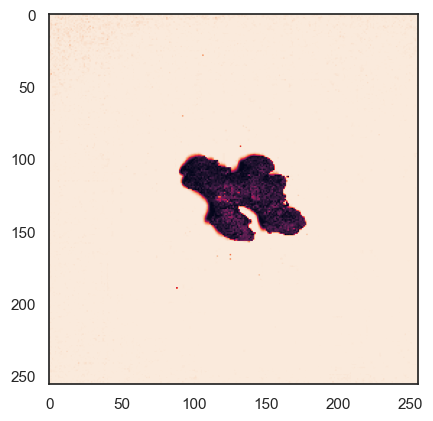

In [10]:
# Some examples
g = plt.imshow(X_train[2][:,:,0])

In [11]:

batch_size = 25
img_height = 256
img_width = 256


In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="training",
    seed=1234,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="validation",
    seed=1234,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
   test_directory,
   #validation_split=0,
   image_size=(img_height, img_width),
   #subset="training",
   shuffle=True,
   batch_size=batch_size,
   seed=123) 


Found 1000 files belonging to 5 classes.
Using 600 files for training.
Found 1000 files belonging to 5 classes.
Using 400 files for validation.
Found 200 files belonging to 5 classes.


In [13]:
train_ds.cardinality().numpy(),  test_ds.cardinality().numpy()


(24, 8)

In [14]:
train_set = train_ds.take(100)
val_set = train_ds.take(30)
# g guna

In [15]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()


(24, 24)

In [16]:
# Cek 5 Kelas dataset
class_names = train_ds.class_names
print(class_names)


['Jahe', 'Kencur', 'Kunyit', 'Lengkuas', 'Temulawak']


In [17]:
# Cek Ukuran gambar input + image_batch
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(25, 256, 256, 3)
(25,)


In [18]:
#data_dir = pathlib.Path('Dataset')

for label in train_ds.class_names:
  images = list(data_dir.glob(f'{label}/*'))
  print(f'{label} : {len(images)}')


Jahe : 200
Kencur : 200
Kunyit : 200
Lengkuas : 200
Temulawak : 200


In [19]:
import matplotlib.pyplot as plt
import random

In [20]:
# print random images from the train set
#plt.figure(figsize = (8, 8))
#for images, labels in train_ds.take(1):
 # for i in range(16):
  #  index = random.randint(0, len(images))
   # ax = plt.subplot(4, 4, i + 1)
    #plt.imshow(images[index].numpy().astype("uint8"))
    #plt.title(train_ds.class_names[labels[index]])
    #plt.axis(False)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [22]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(40, kernel_size=5, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.1),
    #layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    #layers.MaxPool2D(),
    #layers.Dropout(0.1),
    #layers.Conv2D(128, kernel_size=5, padding='same', activation='relu'),
    #layers.MaxPool2D(),
    #layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes)
])


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])
              
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]


In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 40)      3040      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 40)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 40)      0         
                                                                 
 flatten (Flatten)           (None, 655360)            0         
                                                                 
 dense (Dense)               (None, 512)               335544832 
                                                        

In [25]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    #callbacks=callbacks
)


# MODEL ini training selama 2 menit untuk 20 epoch


Epoch 1/10
24/24 [==============================] - 67s 3s/step - loss: 40.2059 - accuracy: 0.4700 - val_loss: 0.5235 - val_accuracy: 0.9050
Epoch 2/10
24/24 [==============================] - 51s 2s/step - loss: 0.2298 - accuracy: 0.9633 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 51s 2s/step - loss: 0.4573 - accuracy: 0.8817 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 52s 2s/step - loss: 0.0297 - accuracy: 0.9983 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 51s 2s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 52s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 52s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 8/10
24/24 [=

In [26]:
model.evaluate(val_ds)
model.evaluate(train_ds)


24/24 [==============================] - 10s 381ms/step - loss: 2.5973e-04 - accuracy: 1.0000


[0.0002597265411168337, 1.0]

In [27]:
model.evaluate(test_ds)


8/8 [==============================] - 5s 329ms/step - loss: 0.3926 - accuracy: 0.8950


[0.3926357328891754, 0.8949999809265137]

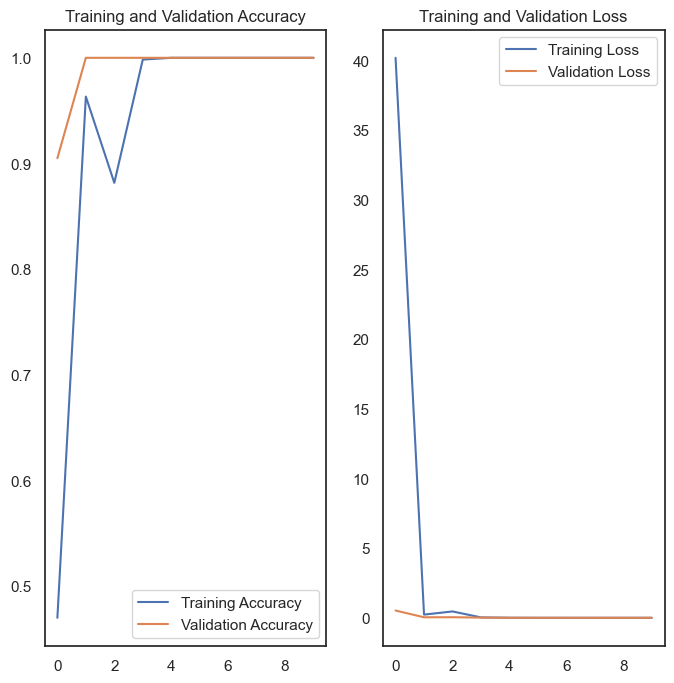

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


epoch:   1 loss: 0.22983277


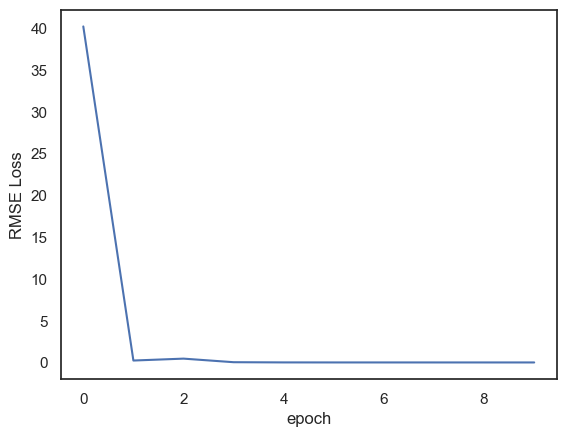

In [29]:
d = history.history
plt.plot(range(epochs), d.get("loss"))
plt.ylabel("RMSE Loss")
plt.xlabel("epoch")

loss = d.get("loss")

for i in range(len(loss)):
    if i % 25 == 1:
        print(f"epoch: {i:3} loss: {loss[i]:10.8f}")


In [30]:
X_test, y_test = None, None
for images, labels in test_ds.take(50):
  if X_test == None or y_test == None:
    X_test = images
    y_test = labels
  else:
    X_test = tf.concat([X_test, images], axis=0)
    y_test = tf.concat([y_test, labels], axis=0)

X_test.shape, y_test.shape


(TensorShape([200, 256, 256, 3]), TensorShape([200]))

In [31]:
from sklearn import metrics


In [32]:
#y_predd = model.predict(train_set)

In [33]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
metrics.accuracy_score(y_test, y_pred)


7/7 [==============================] - 2s 314ms/step


0.895

In [34]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))


0.8949492068020096

In [35]:
import warnings
warnings.filterwarnings('ignore')


In [36]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      1.00      0.99        40
           2       0.88      0.90      0.89        40
           3       0.89      0.80      0.84        40
           4       0.74      0.78      0.76        40

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



['Jahe', 'Kencur', 'Kunyit', 'Lengkuas', 'Temulawak']


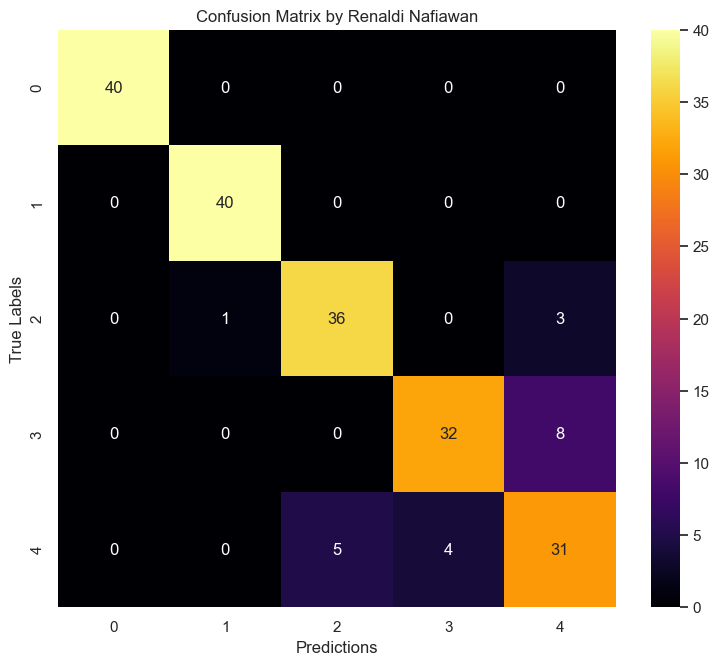

In [37]:
import seaborn as sns

print(test_ds.class_names)
plt.figure(figsize=(9, 7.5), dpi=100)
sns.heatmap(metrics.confusion_matrix(
    y_test, y_pred), annot=True, cmap='inferno')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix by Renaldi Nafiawan')
plt.show()


In [38]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model):

  shuffled_data = test_ds.shuffle(50)
  #class_names = dataset.class_names
  class_names = test_ds.class_names


  for images, labels in shuffled_data.take(1):
    plt.figure(figsize = (12, 12), dpi = 120)
    y_pred_proba = model.predict(images)

    for i in range(16):
      index = random.randint(0, len(images))
      ax = plt.subplot(4, 4, i + 1)

      img = images[index].numpy().astype("uint8")
      y_true = class_names[labels[index]]
      y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]
      
      c = 'g' if y_pred == y_true else 'r'
      
      plt.imshow(img)
      plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
      plt.axis(False)

1/1 [==============================] - 0s 328ms/step


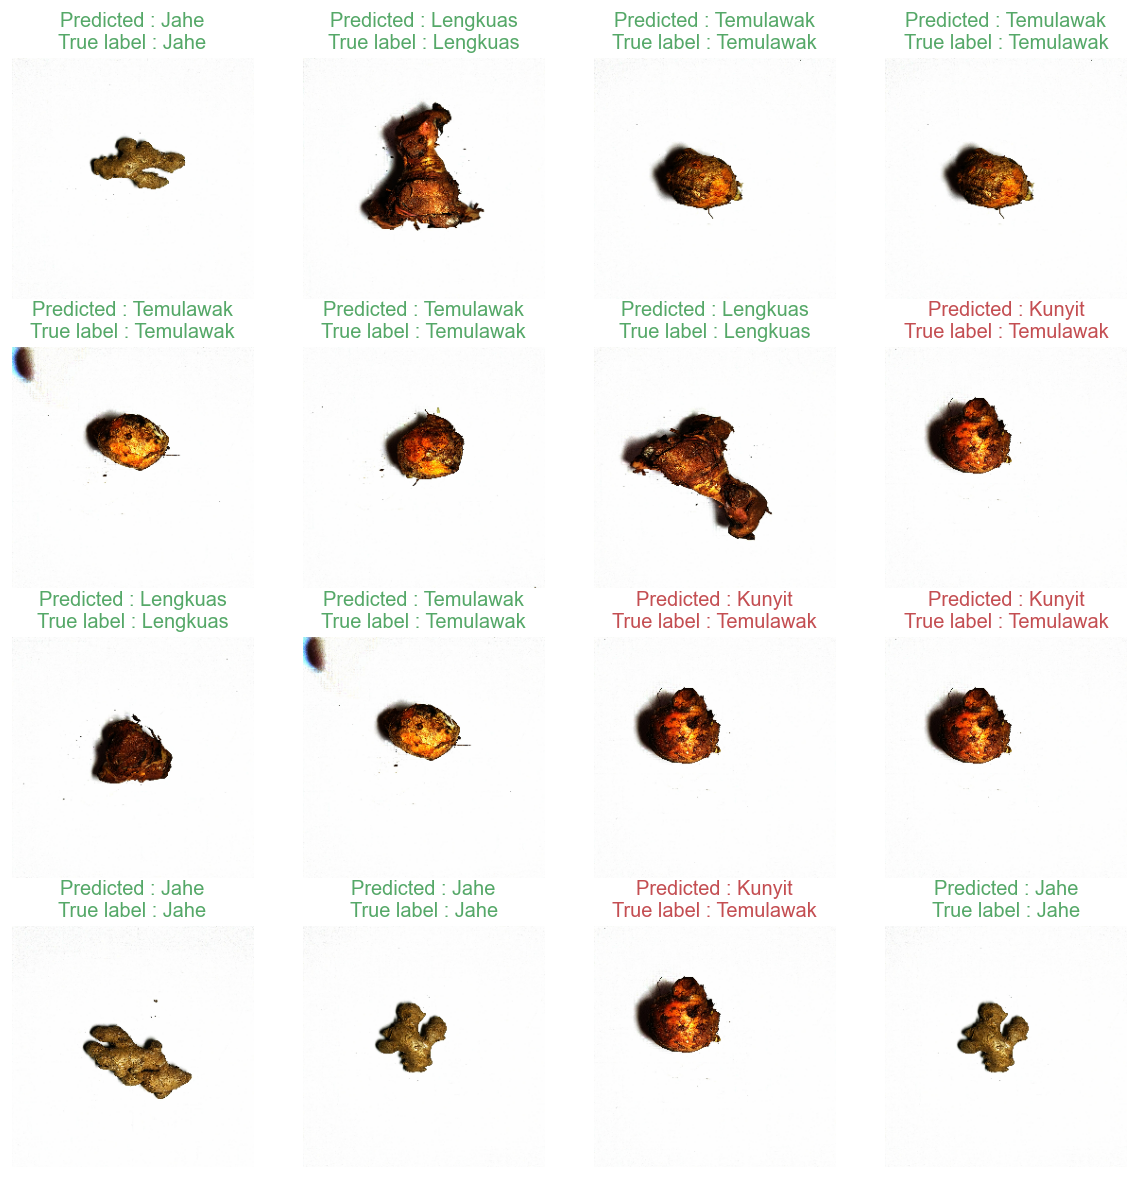

In [41]:
plot_random_predictions(test_ds, model)
